In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

C:\Users\mltla\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mltla\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\mltla\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


_________________________ndays = 0__________________________
SVC
[0.572, 0.614, 0.641, 0.672, 0.72, 0.738, 0.762, 0.824, 0.815, 0.816, 0.82, 0.817, 0.818, 0.839, 0.868, 0.865, 0.876, 0.878, 0.879, 0.882]
[0.102, 0.095, 0.084, 0.074, 0.072, 0.066, 0.061, 0.058, 0.062, 0.06, 0.06, 0.057, 0.057, 0.056, 0.062, 0.07, 0.061, 0.057, 0.061, 0.056]
0.882


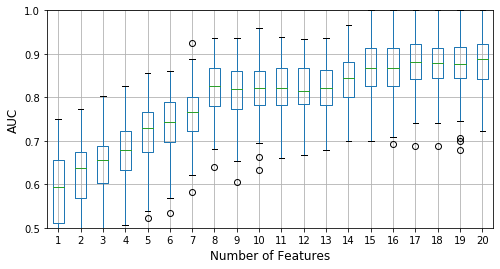

_________________________ndays = 0__________________________
SVC
[0.643, 0.681, 0.675, 0.729, 0.766, 0.789, 0.797, 0.826, 0.815, 0.811, 0.813, 0.813, 0.817, 0.825, 0.82, 0.822, 0.835, 0.832, 0.827, 0.825]
[0.113, 0.085, 0.074, 0.056, 0.042, 0.041, 0.041, 0.038, 0.047, 0.048, 0.045, 0.049, 0.045, 0.045, 0.064, 0.06, 0.048, 0.054, 0.057, 0.056]
0.835


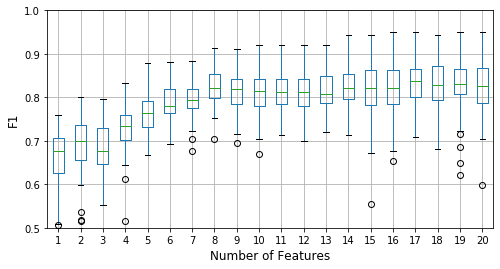

_________________________ndays = 0__________________________
SVC
[0.565, 0.604, 0.597, 0.658, 0.706, 0.734, 0.743, 0.788, 0.781, 0.777, 0.778, 0.778, 0.782, 0.792, 0.797, 0.799, 0.809, 0.807, 0.799, 0.801]
[0.074, 0.072, 0.075, 0.059, 0.058, 0.056, 0.054, 0.049, 0.059, 0.06, 0.057, 0.063, 0.058, 0.057, 0.066, 0.066, 0.057, 0.063, 0.061, 0.061]
0.809


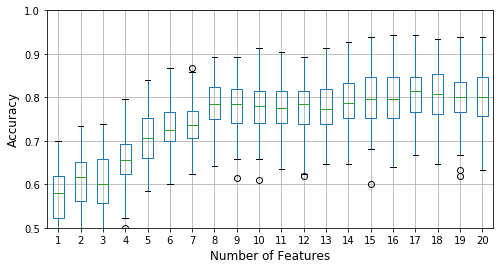

In [34]:
featureE = "Chi"
split = 1
name = "net"
ndays = 0
modelTypelist = ["SVC"]
scorelist = ["AUC", "F1","Accuracy"]
sampling = "down"

for score in scorelist:
    print("_________________________ndays = " + str(ndays) + "__________________________")
    for modelType in modelTypelist:
        print(modelType)
        filename = "results" + str(split) + name + str(ndays) + "days" + featureE + sampling + ".csv"
            
        resultsDF = pd.read_csv(filename)
        resultsDF = resultsDF[resultsDF["model"] == modelType]
        resultsDF = resultsDF[resultsDF["nFeatures"] <= 20]

        df = pd.DataFrame()
        averages = []
        stds = []
        for parameter in sorted(set(resultsDF.nFeatures)):
            df[str(parameter)] = list(resultsDF[resultsDF["nFeatures"] == parameter][score])
            averages.append(round(sum(resultsDF[resultsDF["nFeatures"] == parameter][score])/100,3))
            stds.append(round(np.std(resultsDF[resultsDF["nFeatures"] == parameter][score]),3))
        print(averages)
        print(stds)
        print(sorted(averages)[-1])
        
        plt.figure(figsize = (8, 4))
        plt.xlabel("Number of Features", fontsize = 12)
        plt.ylabel(score, fontsize = 12)
        #plt.title("Screening with the Prior Week of Texts", fontsize = 15)
        df.boxplot()
        plt.ylim(0.5, 1)

        #plt.savefig("boxplots" + score + ".png", bbox_inches = "tight")
        plt.show()
        plt.close()

In [52]:
filename = "results" + str(split) + name + str(ndays) + "days" + featureE + sampling + ".csv"
            
resultsDF = pd.read_csv(filename)
resultsDF = resultsDF[resultsDF["model"] == "SVC1"]
resultsDF = resultsDF[resultsDF["nFeatures"] == 8]

tn = sum(resultsDF.trueNeg)/len(resultsDF.trueNeg)
fp = sum(resultsDF.falsePos)/len(resultsDF.falsePos)
spec = tn/(tn+fp)
print(spec)

0.6090361445783131


_________________________ndays = 1__________________________
SVC
0.8816


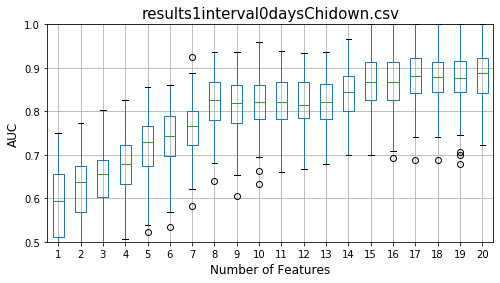

NB
0.7574


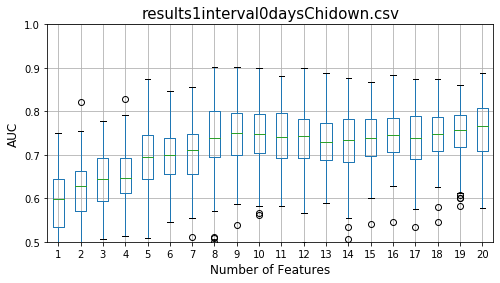

LR
0.831


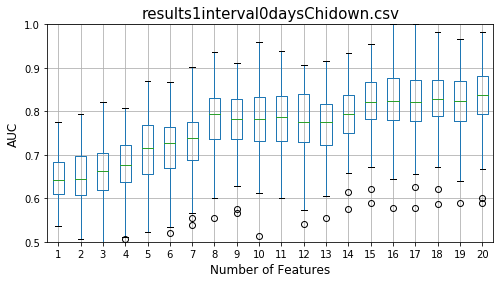

kNN
0.684


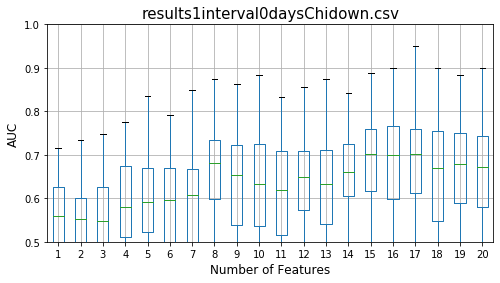

_________________________ndays = 2__________________________
SVC
0.7775


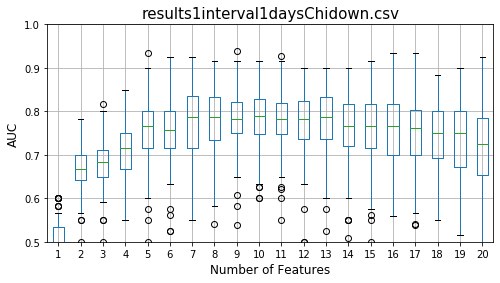

NB
0.7146


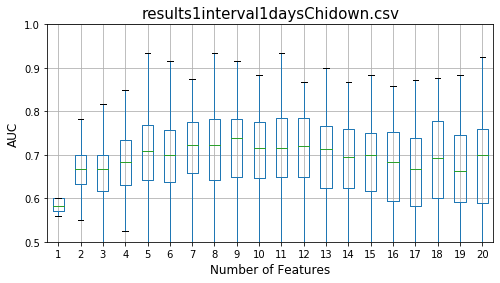

LR
0.7104


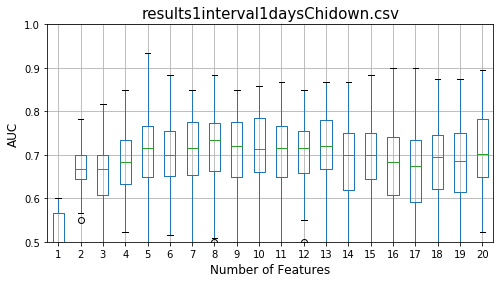

kNN
0.5804


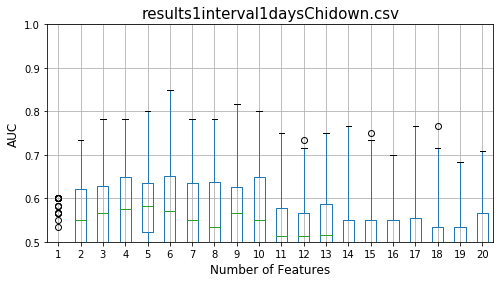

_________________________ndays = 3__________________________
SVC
0.7738


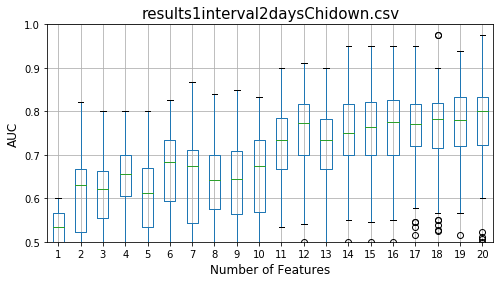

NB
0.7736


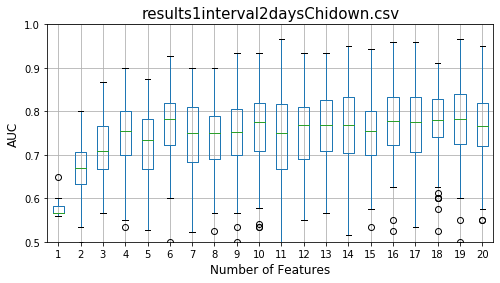

LR
0.8363


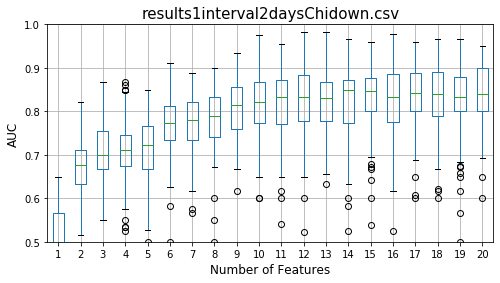

kNN
0.6925


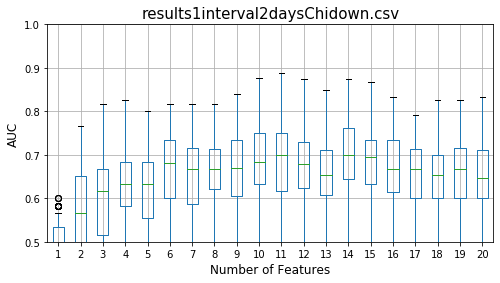

_________________________ndays = 4__________________________
SVC
0.8819


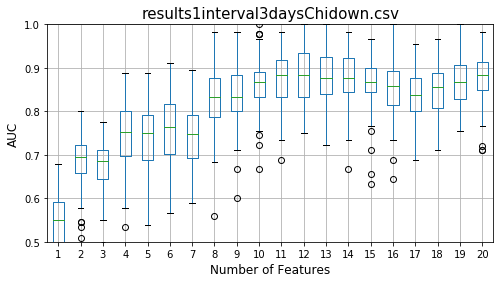

NB
0.7772


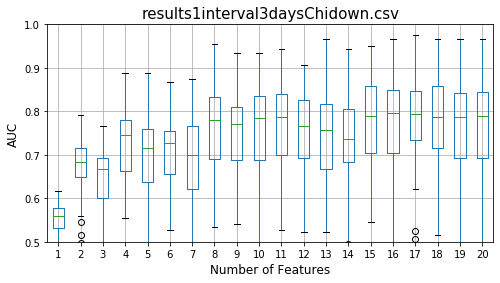

LR
0.893


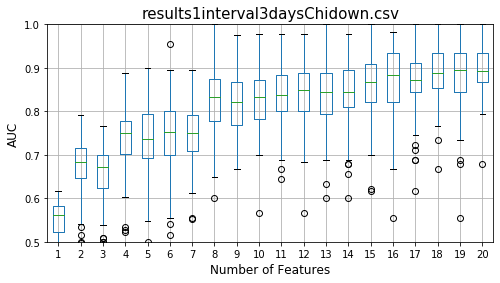

kNN
0.7695


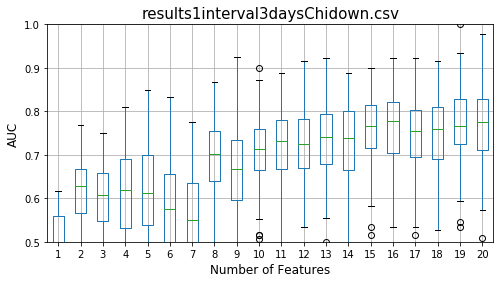

_________________________ndays = 5__________________________
SVC
0.8146


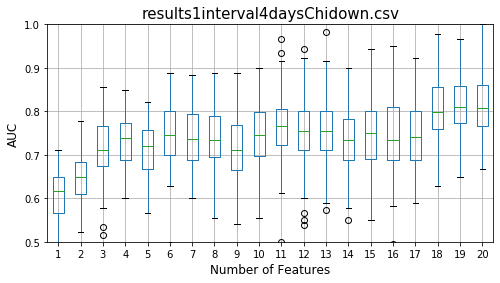

NB
0.8208


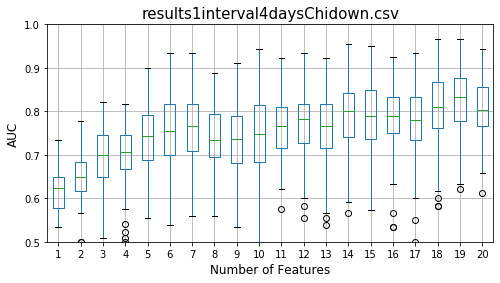

LR
0.845


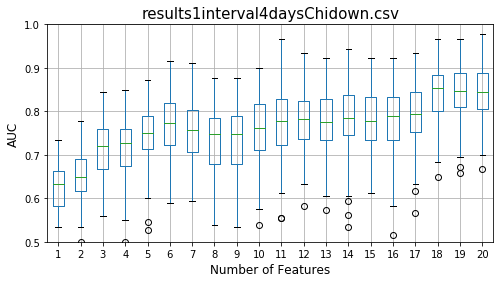

kNN
0.656


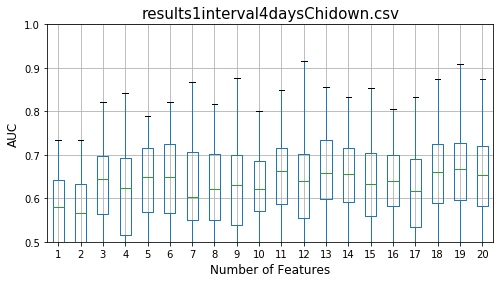

_________________________ndays = 6__________________________
SVC
0.7433


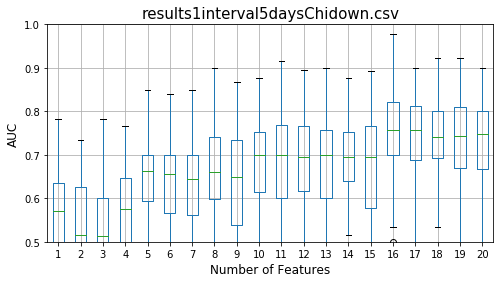

NB
0.7581


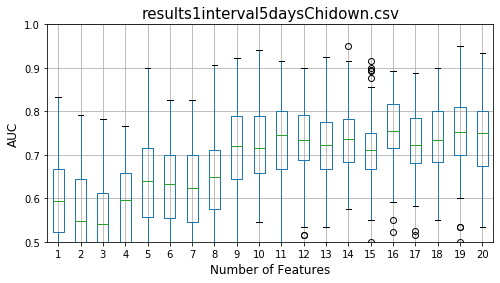

LR
0.8156


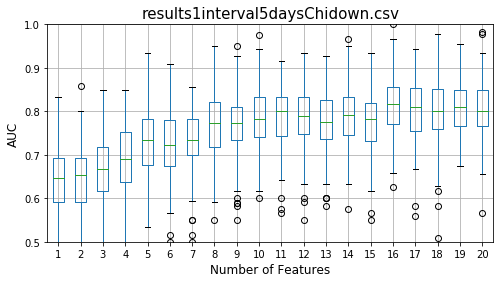

kNN
0.6848


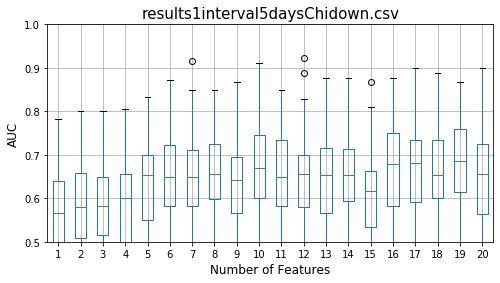

_________________________ndays = 7__________________________
SVC
0.7403


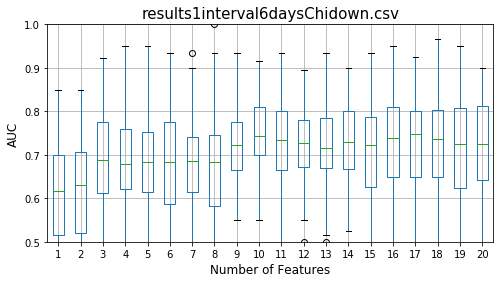

NB
0.7665


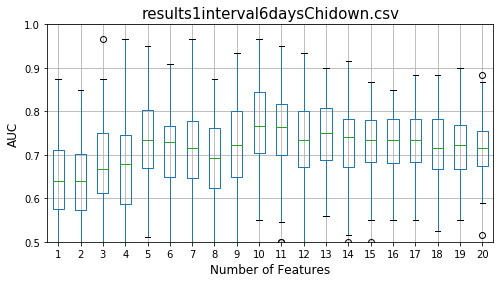

LR
0.8278


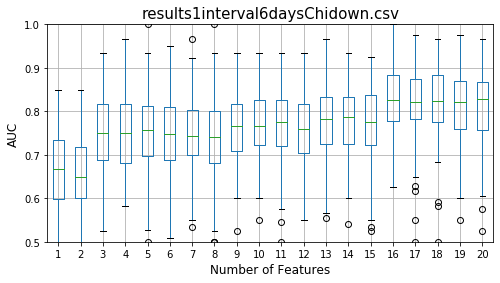

kNN
0.6919


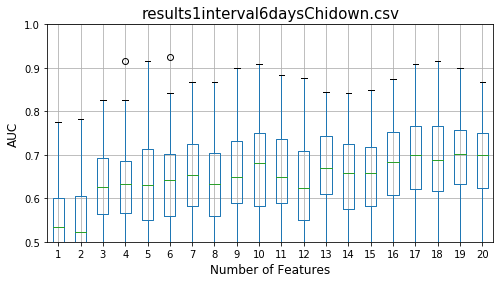

_________________________ndays = 8__________________________
SVC
0.8092


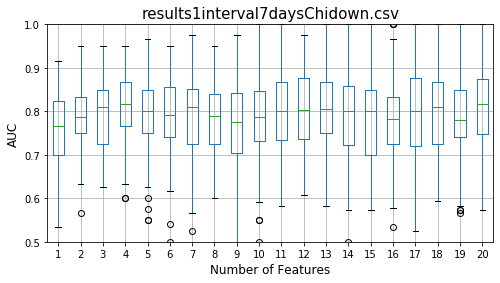

NB
0.8029


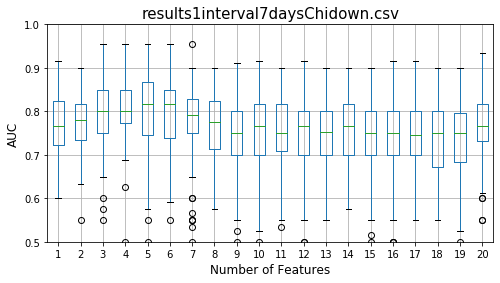

LR
0.8466


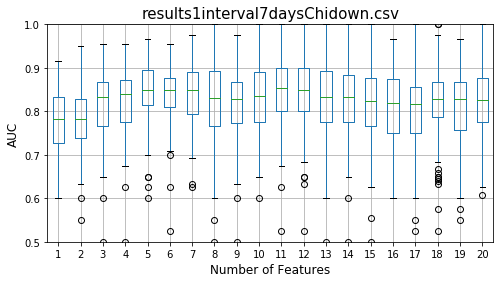

kNN
0.7302


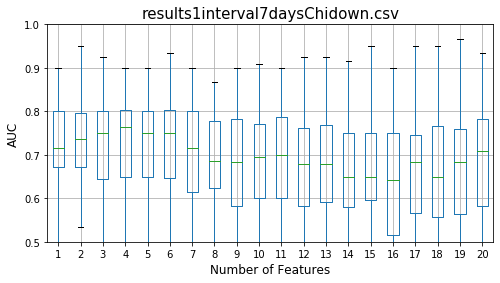

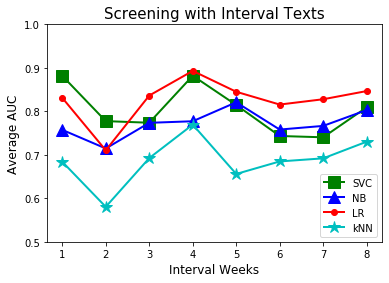

In [7]:
featureE = "Chi"
split = 1
name = "interval"
ndayslist = [0, 1, 2, 3, 4, 5, 6, 7]
ndayslist1 = [1, 2, 3, 4, 5, 6, 7, 8]
modelTypelist = ["SVC", "NB", "LR", "kNN"]
score = "AUC"
sampling = "down"
modelValues = []

for ndays in ndayslist:
    print("_________________________ndays = " + str(ndays+1) + "__________________________")
    for modelType in modelTypelist:
        filename = "results" + str(split) + name + str(ndays) + "days" + featureE + sampling + ".csv"
        try:
            resultsDF = pd.read_csv(filename)
            print(modelType)
            resultsDF = resultsDF[resultsDF["model"] == modelType]
            resultsDF = resultsDF[resultsDF["nFeatures"] <= 20]

            
            df = pd.DataFrame()
            averages = []
            for parameter in sorted(set(resultsDF.nFeatures)):
                df[str(parameter)] = list(resultsDF[resultsDF["nFeatures"] == parameter][score])
                averages.append(round(sum(resultsDF[resultsDF["nFeatures"] == parameter][score])/100,4))
            print(sorted(averages)[-1])

            plt.figure(figsize = (8, 4))
            plt.xlabel("Number of Features", fontsize = 12)
            plt.ylabel(score, fontsize = 12)
            plt.title(filename, fontsize = 15)
            df.boxplot()
            plt.ylim(0.5, 1)
            plt.show()
            plt.close()
            
        except:
            print(filename)
            
for modelType in modelTypelist:
    mvalues = []
    for ndays in ndayslist:
        filename = "results" + str(split)+ name  + str(ndays) + "days" + featureE + sampling + ".csv"
        try:
            resultsDF = pd.read_csv(filename)
            resultsDF = resultsDF[resultsDF["model"] == modelType]
            resultsDF = resultsDF[resultsDF["nFeatures"] <= 20]
            
            df = pd.DataFrame()
            averages = []
            for parameter in sorted(set(resultsDF.nFeatures)):
                df[str(parameter)] = list(resultsDF[resultsDF["nFeatures"] == parameter][score])
                averages.append(round(sum(resultsDF[resultsDF["nFeatures"] == parameter][score])/100,4))
            mvalues.append(sorted(averages)[-1])
        except:
            print(filename)
    modelValues.append(mvalues)

plt.figure(figsize = (6, 4))
markers = ["s", "^", ".", "*"]
colors = ["g", "b", "r", "c"]
for i in range(0, len(modelTypelist)):
    plt.plot(ndayslist1, modelValues[i], c = colors[i], marker = markers[i], label = modelTypelist[i], linewidth=2, markersize=12)

plt.ylim(0.5, 1)
plt.xlabel("Interval Weeks", fontsize = 12)
plt.ylabel("Average " + score, fontsize = 12)
plt.title("Screening with Interval Texts", fontsize = 15)
plt.legend()

plt.savefig(name + score + ".png", bbox_inches = "tight")

plt.show()
plt.close()

_________________________ndays = 1__________________________
SVC
0.8816


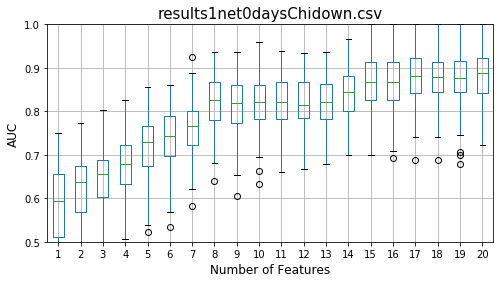

NB
0.7574


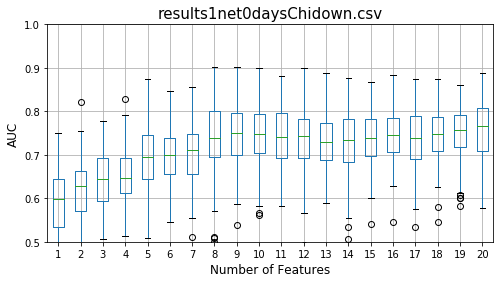

LR
0.831


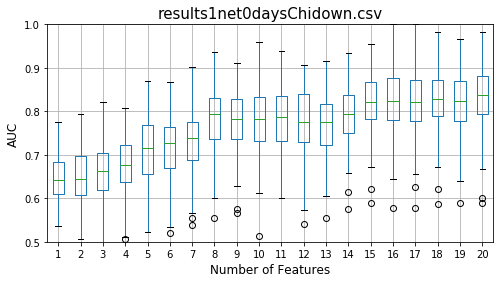

kNN
0.684


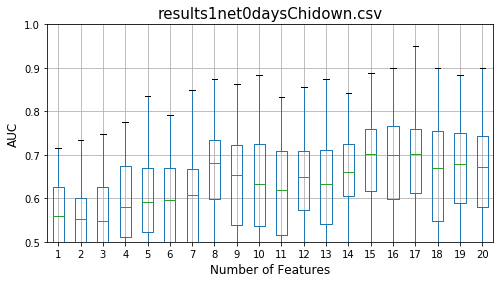

_________________________ndays = 2__________________________
SVC
0.6876


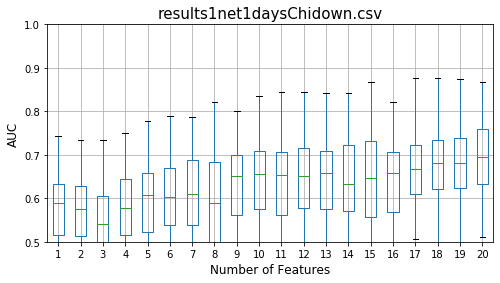

NB
0.7615


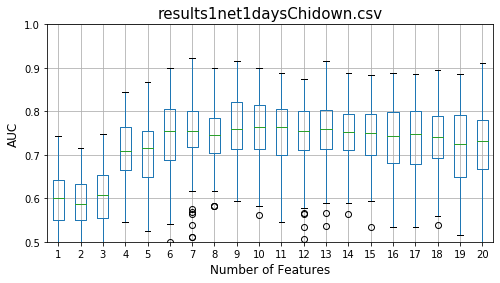

LR
0.724


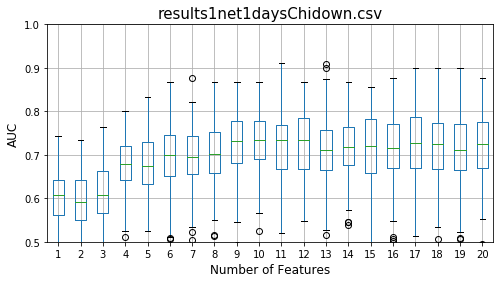

kNN
0.6116


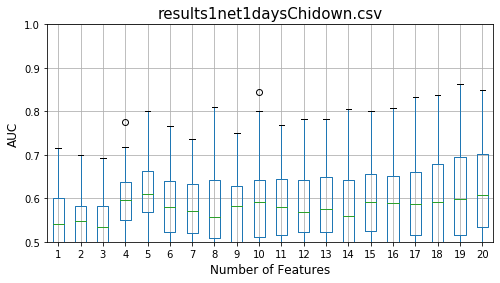

_________________________ndays = 3__________________________
SVC
0.6836


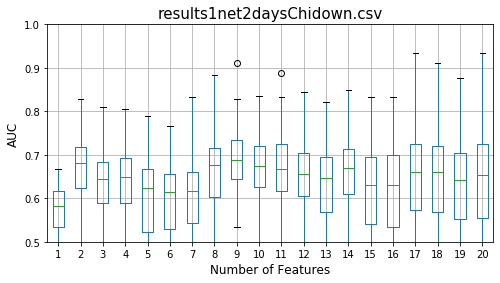

NB
0.7335


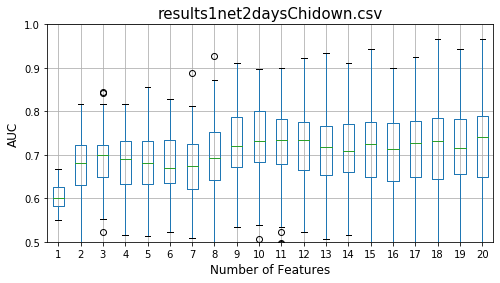

LR
0.7495


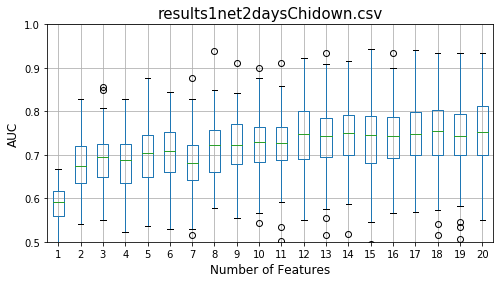

kNN
0.6326


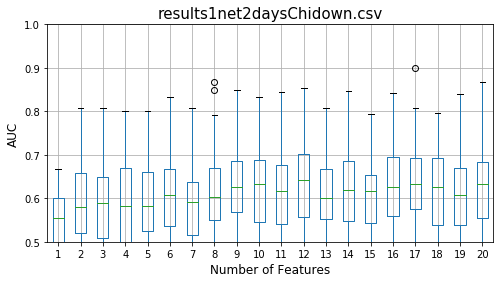

_________________________ndays = 4__________________________
SVC
0.6934


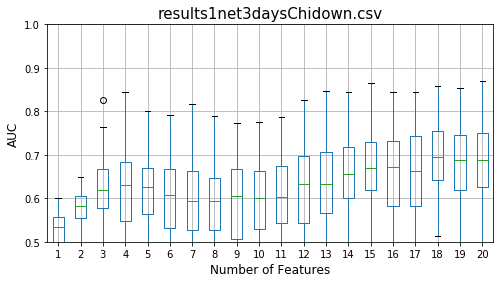

NB
0.7827


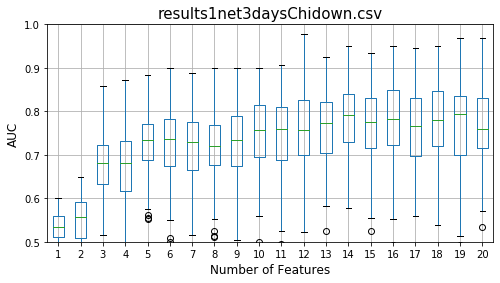

LR
0.7895


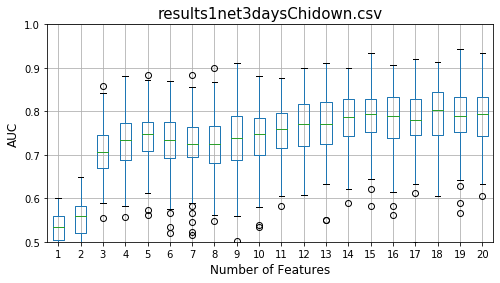

kNN
0.6478


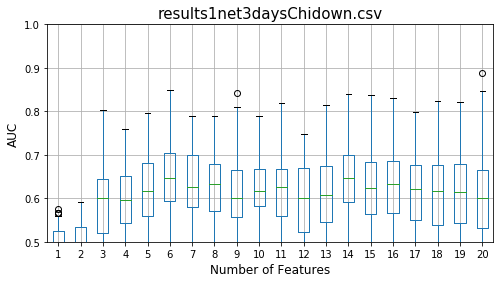

_________________________ndays = 5__________________________
SVC
0.7339


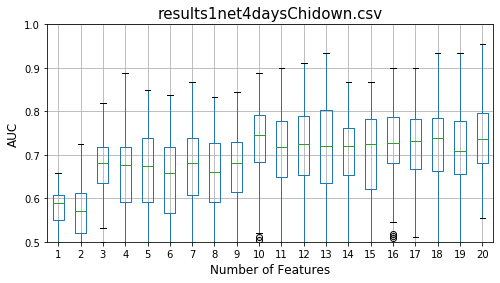

NB
0.8433


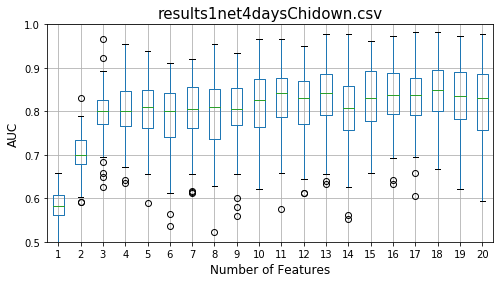

LR
0.8407


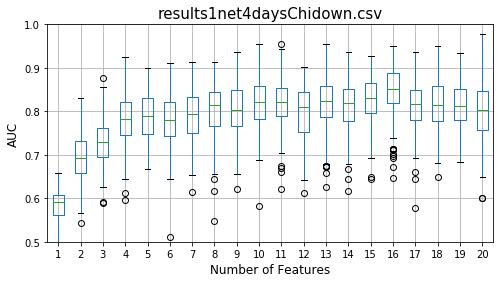

kNN
0.6824


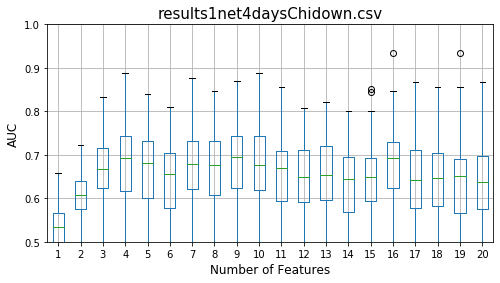

_________________________ndays = 6__________________________
SVC
0.7448


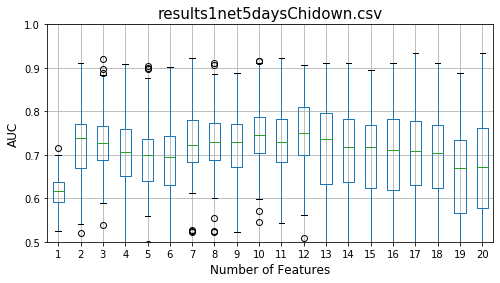

NB
0.8211


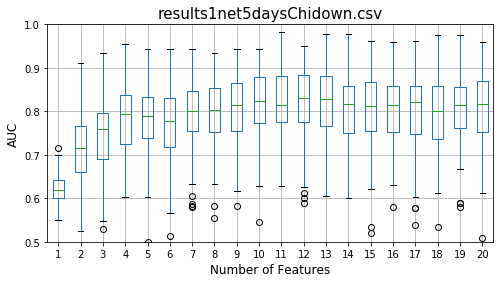

LR
0.8038


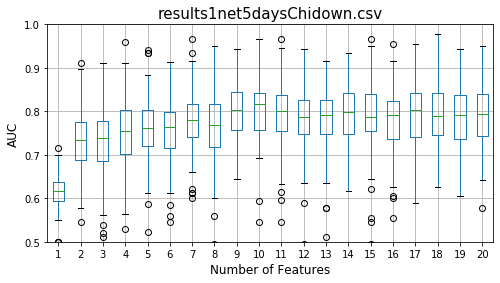

kNN
0.6568


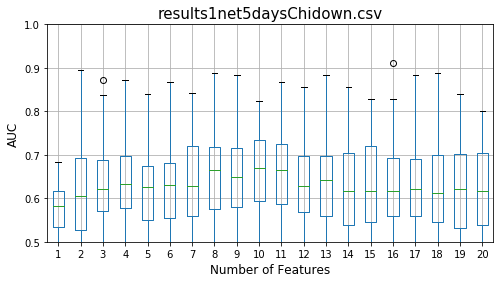

_________________________ndays = 7__________________________
SVC
0.7314


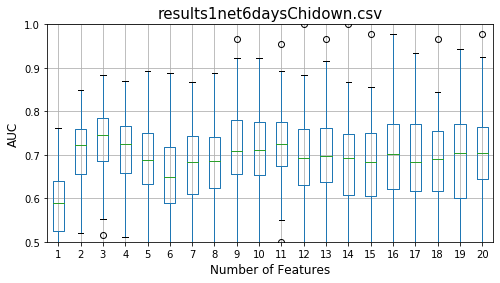

NB
0.7619


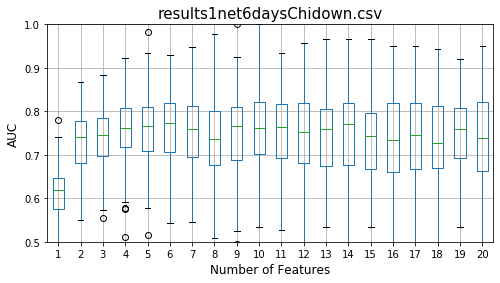

LR
0.7972


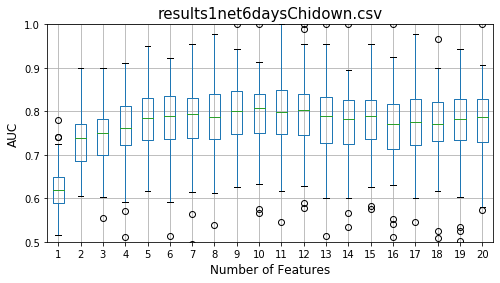

kNN
0.6502


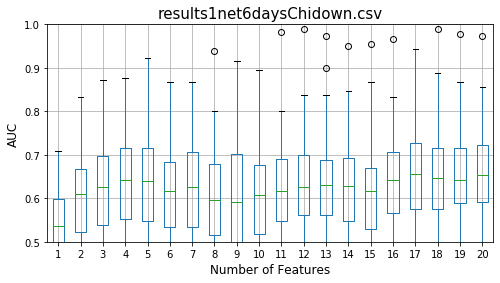

_________________________ndays = 8__________________________
SVC
0.7097


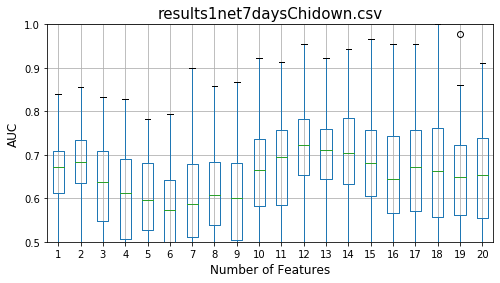

NB
0.7228


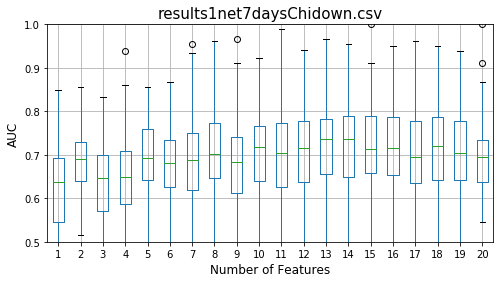

LR
0.7859


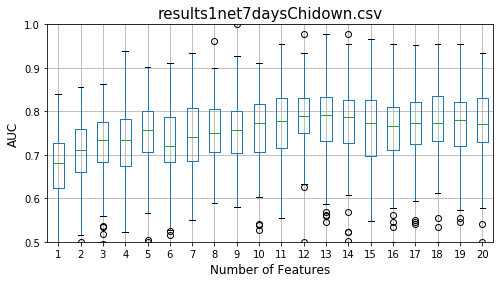

kNN
0.6217


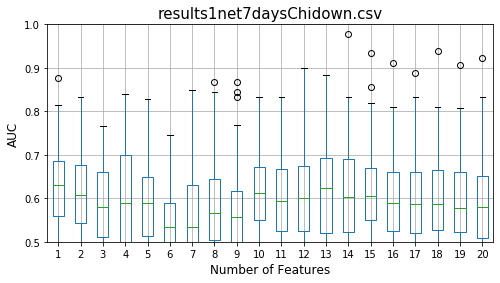

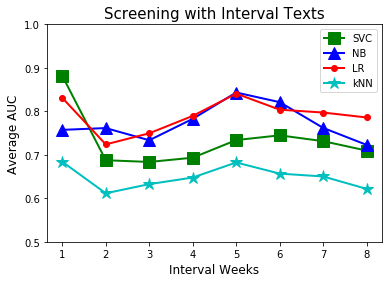

In [6]:
featureE = "Chi"
split = 1
name = "net"
ndayslist = [0, 1, 2, 3, 4, 5, 6, 7]
ndayslist1 = [1, 2, 3, 4, 5, 6, 7, 8]
modelTypelist = ["SVC", "NB", "LR", "kNN"]
score = "AUC"
sampling = "down"
modelValues = []

for ndays in ndayslist:
    print("_________________________ndays = " + str(ndays+1) + "__________________________")
    for modelType in modelTypelist:
        filename = "results" + str(split) + name + str(ndays) + "days" + featureE + sampling + ".csv"
        try:
            resultsDF = pd.read_csv(filename)
            print(modelType)
            resultsDF = resultsDF[resultsDF["model"] == modelType]
            resultsDF = resultsDF[resultsDF["nFeatures"] <= 20]

            
            df = pd.DataFrame()
            averages = []
            for parameter in sorted(set(resultsDF.nFeatures)):
                df[str(parameter)] = list(resultsDF[resultsDF["nFeatures"] == parameter][score])
                averages.append(round(sum(resultsDF[resultsDF["nFeatures"] == parameter][score])/100,4))
            print(sorted(averages)[-1])

            plt.figure(figsize = (8, 4))
            plt.xlabel("Number of Features", fontsize = 12)
            plt.ylabel(score, fontsize = 12)
            plt.title(filename, fontsize = 15)
            df.boxplot()
            plt.ylim(0.5, 1)
            plt.show()
            plt.close()
            
        except:
            print(filename)
            
for modelType in modelTypelist:
    mvalues = []
    for ndays in ndayslist:
        filename = "results" + str(split)+ name  + str(ndays) + "days" + featureE + sampling + ".csv"
        try:
            resultsDF = pd.read_csv(filename)
            resultsDF = resultsDF[resultsDF["model"] == modelType]
            resultsDF = resultsDF[resultsDF["nFeatures"] <= 20]
            
            df = pd.DataFrame()
            averages = []
            for parameter in sorted(set(resultsDF.nFeatures)):
                df[str(parameter)] = list(resultsDF[resultsDF["nFeatures"] == parameter][score])
                averages.append(round(sum(resultsDF[resultsDF["nFeatures"] == parameter][score])/100,4))
            mvalues.append(sorted(averages)[-1])
        except:
            print(filename)
    modelValues.append(mvalues)

plt.figure(figsize = (6, 4))
markers = ["s", "^", ".", "*"]
colors = ["g", "b", "r", "c"]
for i in range(0, len(modelTypelist)):
    plt.plot(ndayslist1, modelValues[i], c = colors[i], marker = markers[i], label = modelTypelist[i], linewidth=2, markersize=12)

plt.ylim(0.5, 1)
plt.xlabel("Interval Weeks", fontsize = 12)
plt.ylabel("Average " + score, fontsize = 12)
plt.title("Screening with Interval Texts", fontsize = 15)
plt.legend()

plt.savefig(name + score + ".png", bbox_inches = "tight")

plt.show()
plt.close()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import preprocessing
from scipy import stats
import collections
import operator
import argparse
import random
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from statistics import mean 
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn import utils
from sklearn.datasets import load_digits
from sklearn import svm
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn.decomposition import PCA, KernelPCA, NMF

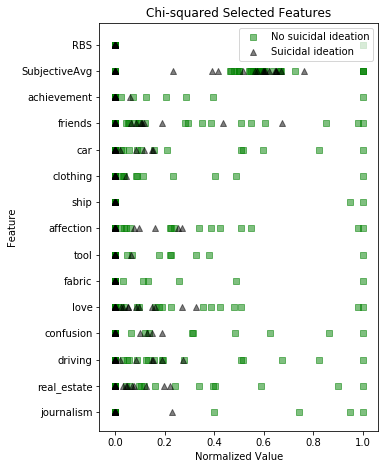

In [9]:
featureE = "Chi"
split = 1
name= "interval" #"net" and "interval"
modelTypelist = ["NB", "LR", "SVC1", "SVC2", "kNN3"]
sampling = "down"

ndays = 0

if name == "interval":
    data = pd.read_csv("Moodable" + str(ndays) + ".csv")
elif name == "net":
    data = pd.read_csv("Moodable" + str(ndays) + "net.csv")

data[data.columns[-1]] = np.where(data[data.columns[-1]] >= split, 1, 0)
features = data[data.columns[1:-1]]
target = data[data.columns[-1]]
min_max_scaler = preprocessing.MinMaxScaler()                   #NEED TO SCALE BEFORE FEATURE SELECTION!
np_scaled = min_max_scaler.fit_transform(features)
featureSubset = pd.DataFrame(np_scaled)

KBest = SelectKBest(chi2, k=15).fit(featureSubset, target) 
f = KBest.get_support(1)
newDF = featureSubset[featureSubset.columns[f]].assign(target = target)
    
columns = features.columns
names = list(columns[f])
names.append("target")
newDF.columns = names
f1 = newDF[newDF.target == 1] #1 is depressed
f0 = newDF[newDF.target == 0] #0 is not depressed

array1 = []
for name in names:
    namelist = []
    for i in range(0, f1.shape[0]):
        namelist.append(name)
    array1.append(namelist)
    
array0 = []
for name in names:
    namelist = []
    for i in range(0, f0.shape[0]):
        namelist.append(name)
    array0.append(namelist)
    
plt.figure(figsize = (5,7.5))
for i in range(0, len(names[:-1])):  #change these numbers to add or remove features
    plt.scatter(f0[names[i]], array0[i], color = 'g', alpha = 0.5, label = "No suicidal ideation", marker = 's')

    plt.scatter(f1[names[i]], array1[i], color = 'k', alpha = 0.5, label = "Suicidal ideation", marker = '^')
    #plt.scatter(array0[i], f0[names[i]], color = 'b', alpha = 0.5, label = "Not Depressed", marker = 's')
    if i == 0:
        plt.legend(loc='upper right')
#plt.xticks(names[:-1], rotation='vertical')
plt.ylabel("Feature")
plt.xlabel("Normalized Value")
plt.title("Chi-squared Selected Features")
#plt.savefig("latencyFeaturesPerParticipant.eps", bbox_inches = "tight")
#plt.savefig("features17.png", bbox_inches = "tight")
plt.show()

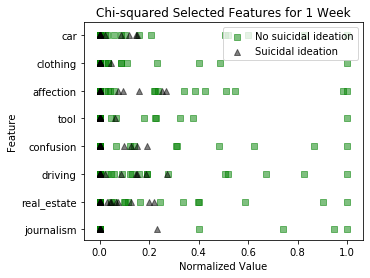

In [71]:
featureE = "Chi"
split = 1
name= "interval" #"net" and "interval"
modelTypelist = ["NB", "LR", "SVC1", "SVC2", "kNN3"]
sampling = "down"

ndays = 0

if name == "interval":
    data = pd.read_csv("Moodable" + str(ndays) + ".csv")
elif name == "net":
    data = pd.read_csv("Moodable" + str(ndays) + "net.csv")

data[data.columns[-1]] = np.where(data[data.columns[-1]] >= split, 1, 0)
features = data[data.columns[1:-1]]
target = data[data.columns[-1]]
min_max_scaler = preprocessing.MinMaxScaler()                   #NEED TO SCALE BEFORE FEATURE SELECTION!
np_scaled = min_max_scaler.fit_transform(features)
featureSubset = pd.DataFrame(np_scaled)

KBest = SelectKBest(chi2, k=8).fit(featureSubset, target) 
f = KBest.get_support(1)
newDF = featureSubset[featureSubset.columns[f]].assign(target = target)
    
columns = features.columns
names = list(columns[f])
names.append("target")
newDF.columns = names
f1 = newDF[newDF.target == 1] #1 is depressed
f0 = newDF[newDF.target == 0] #0 is not depressed

array1 = []
for name in names:
    namelist = []
    for i in range(0, f1.shape[0]):
        namelist.append(name)
    array1.append(namelist)
    
array0 = []
for name in names:
    namelist = []
    for i in range(0, f0.shape[0]):
        namelist.append(name)
    array0.append(namelist)
    
plt.figure(figsize = (5,4))
for i in range(0, len(names[:-1])):  #change these numbers to add or remove features
    plt.scatter(f0[names[i]], array0[i], color = 'g', alpha = 0.5, label = "No suicidal ideation", marker = 's')

    plt.scatter(f1[names[i]], array1[i], color = 'k', alpha = 0.5, label = "Suicidal ideation", marker = '^')
    #plt.scatter(array0[i], f0[names[i]], color = 'b', alpha = 0.5, label = "Not Depressed", marker = 's')
    if i == 0:
        plt.legend(loc='upper right')
#plt.xticks(names[:-1], rotation='vertical')
plt.ylabel("Feature")
plt.xlabel("Normalized Value")
plt.title("Chi-squared Selected Features for 1 Week")
#plt.savefig("latencyFeaturesPerParticipant.eps", bbox_inches = "tight")
#plt.savefig("TextsSI/net14fig.png", bbox_inches = "tight")
plt.show()

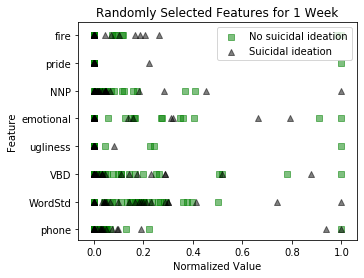

In [79]:
featureE = "Chi"
split = 1
name= "interval" #"net" and "interval"
modelTypelist = ["NB", "LR", "SVC1", "SVC2", "kNN3"]
sampling = "down"

ndays = 0

if name == "interval":
    data = pd.read_csv("Moodable" + str(ndays) + ".csv")
elif name == "net":
    data = pd.read_csv("Moodable" + str(ndays) + "net.csv")

data[data.columns[-1]] = np.where(data[data.columns[-1]] >= split, 1, 0)
features = data[data.columns[1:-1]]
target = data[data.columns[-1]]
min_max_scaler = preprocessing.MinMaxScaler()                   #NEED TO SCALE BEFORE FEATURE SELECTION!
np_scaled = min_max_scaler.fit_transform(features)
featureSubset = pd.DataFrame(np_scaled)

f = []
for i in range(0, 8):
    f.append(random.randint(0, 244))
    
columns = features.columns
names = list(columns[f])
names.append("target")
featureSubset.columns = columns
featureSubset = featureSubset.assign(target = target)
newDF = featureSubset[names]
f1 = newDF[newDF.target == 1] #1 is depressed
f0 = newDF[newDF.target == 0] #0 is not depressed

array1 = []
for name in names:
    namelist = []
    for i in range(0, f1.shape[0]):
        namelist.append(name)
    array1.append(namelist)
    
array0 = []
for name in names:
    namelist = []
    for i in range(0, f0.shape[0]):
        namelist.append(name)
    array0.append(namelist)
    
plt.figure(figsize = (5,4))
for i in range(0, len(names[:-1])):  #change these numbers to add or remove features
    plt.scatter(f0[names[i]], array0[i], color = 'g', alpha = 0.5, label = "No suicidal ideation", marker = 's')

    plt.scatter(f1[names[i]], array1[i], color = 'k', alpha = 0.5, label = "Suicidal ideation", marker = '^')
    #plt.scatter(array0[i], f0[names[i]], color = 'b', alpha = 0.5, label = "Not Depressed", marker = 's')
    if i == 0:
        plt.legend(loc='upper right')
#plt.xticks(names[:-1], rotation='vertical')
plt.ylabel("Feature")
plt.xlabel("Normalized Value")
plt.title("Randomly Selected Features for 1 Week")
#plt.savefig("latencyFeaturesPerParticipant.eps", bbox_inches = "tight")
#plt.savefig("TextsSI/net14fig.png", bbox_inches = "tight")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

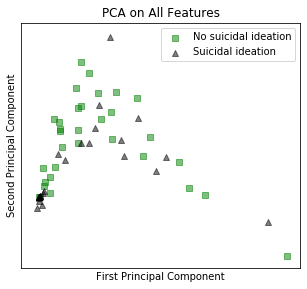

In [90]:
numberOfFeatures = 2

featureE = "Chi"
split = 1
name= "interval" #"net" and "interval"
modelTypelist = ["NB", "LR", "SVC1", "SVC2", "kNN3"]
sampling = "down"

ndays = 0

if name == "interval":
    data = pd.read_csv("Moodable" + str(ndays) + ".csv")
elif name == "net":
    data = pd.read_csv("Moodable" + str(ndays) + "net.csv")

data[data.columns[-1]] = np.where(data[data.columns[-1]] >= split, 1, 0)
features = data[data.columns[1:-1]]
target = data[data.columns[-1]]
min_max_scaler = preprocessing.MinMaxScaler()                   #NEED TO SCALE BEFORE FEATURE SELECTION!
np_scaled = min_max_scaler.fit_transform(features)
featureSubset = pd.DataFrame(np_scaled)

pca = PCA(n_components=numberOfFeatures)
pca.fit(featureSubset)
X_pca = pca.transform(featureSubset)
pcaDF = pd.DataFrame(X_pca)
pcaDF = pcaDF.assign(target = target)

f1 = pcaDF[pcaDF.target == 1]
f0 = pcaDF[pcaDF.target == 0]

plt.figure(figsize = (5,4.5))
plt.scatter(f0[0], f0[1], alpha = 0.5, label = "No suicidal ideation", marker = 's', color = 'g')
plt.scatter(f1[0], f1[1], alpha = 0.5, label = "Suicidal ideation", marker = '^', color = 'k')
plt.title("PCA on All Features")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.xticks([], [])
plt.yticks([], [])
plt.savefig("paperPCA2text10.png", bbox_inches = "tight")
plt.savefig("paperPCA2text10.eps", bbox_inches = "tight")
plt.show()
plt.close()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

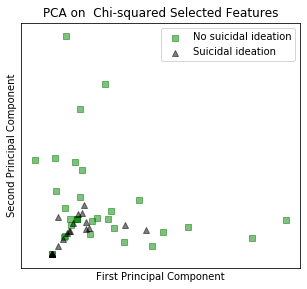

In [94]:
numberOfFeatures = 2

featureE = "Chi"
split = 1
name= "interval" #"net" and "interval"
modelTypelist = ["NB", "LR", "SVC1", "SVC2", "kNN3"]
sampling = "down"

ndays = 0

if name == "interval":
    data = pd.read_csv("Moodable" + str(ndays) + ".csv")
elif name == "net":
    data = pd.read_csv("Moodable" + str(ndays) + "net.csv")

data[data.columns[-1]] = np.where(data[data.columns[-1]] >= split, 1, 0)
features = data[data.columns[1:-1]]
target = data[data.columns[-1]]
min_max_scaler = preprocessing.MinMaxScaler()                   #NEED TO SCALE BEFORE FEATURE SELECTION!
np_scaled = min_max_scaler.fit_transform(features)
featureSubset = pd.DataFrame(np_scaled)

KBest = SelectKBest(chi2, k=17).fit(featureSubset, target) 
f = KBest.get_support(1)
newDF = featureSubset[featureSubset.columns[f]]#.assign(target = target)

pca = PCA(n_components=numberOfFeatures)
pca.fit(newDF)
X_pca = pca.transform(newDF)
pcaDF = pd.DataFrame(X_pca)
pcaDF = pcaDF.assign(target = target)

f1 = pcaDF[pcaDF.target == 1]
f0 = pcaDF[pcaDF.target == 0]

plt.figure(figsize = (5,4.5))
plt.scatter(f0[0], f0[1], alpha = 0.5, label = "No suicidal ideation", marker = 's', color = 'g')
plt.scatter(f1[0], f1[1], alpha = 0.5, label = "Suicidal ideation", marker = '^', color = 'k')
plt.title("PCA on  Chi-squared Selected Features")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.xticks([], [])
plt.yticks([], [])
plt.savefig("paperPCA2text10.png", bbox_inches = "tight")
plt.savefig("paperPCA2text10.eps", bbox_inches = "tight")
plt.show()
plt.close()